In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
google_data = pd.read_csv('GOOG_ALL_TIME_DATA.csv')

In [3]:
google_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4194,2021-04-19,2291.979980,2318.449951,2287.844971,2302.399902,2302.399902,1234400
4195,2021-04-20,2307.889893,2309.600098,2271.709961,2293.629883,2293.629883,1088700
4196,2021-04-21,2285.250000,2295.320068,2258.570068,2293.290039,2293.290039,1196500
4197,2021-04-22,2293.229980,2303.761963,2256.449951,2267.919922,2267.919922,1054800


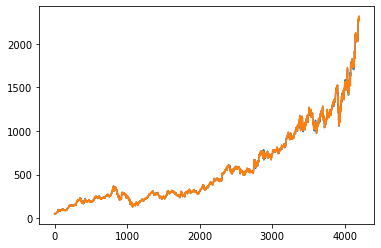

In [4]:
plt.plot(google_data['Open'])
plt.plot(google_data['Close'])

In [5]:
google_data['Close'].min()

49.818267999999996

When was the lowest close by the company? 

In [6]:
lowest_close = google_data[google_data['Close'].min() == google_data['Close']]['Date']

When was the highest close by the company? 

In [7]:
highest_close = google_data[google_data['Close'].max() == google_data['Close']]['Date']

When was the lowest Open by the company?

In [8]:
lowest_open = google_data[google_data['Open'].min() == google_data['Open']]['Date']

When was the highest open by the company?

In [9]:
highest_open = google_data[google_data['Open'].max() == google_data['Open']]['Date']
highest_open

4195    2021-04-20
Name: Date, dtype: object

In [10]:
min_close_df = google_data[google_data['Close'].min() == google_data['Close']]
max_close_df = google_data[google_data['Close'].max() == google_data['Close']]

<BarContainer object of 1 artists>

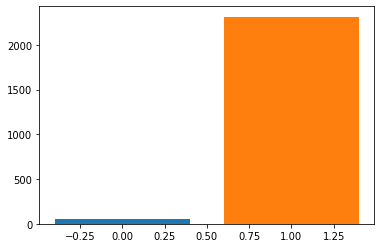

In [11]:
plt.bar(x=[0], height=min_close_df['Close'].tolist()[0])
plt.bar(x=[1], height=max_close_df['Close'].tolist()[0])

Given 2 dates, an starting point and a ending point, which were the first 5 top stock prices by the end of the day? 

In [12]:
start_date = '2010-09-10'
end_date = '2020-10-17'

sample_google_data = google_data[google_data['Date'] >= start_date]
sample_google_data = sample_google_data[sample_google_data['Date'] <= end_date]

<BarContainer object of 5 artists>

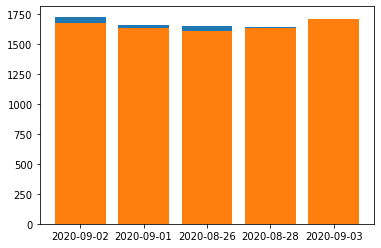

In [13]:
sorted_sample_google_data = sample_google_data
sorted_sample_google_data = sorted_sample_google_data.sort_values(by=['Close'], ascending=False).head()

plt.bar(sorted_sample_google_data['Date'],sorted_sample_google_data['Close'])
plt.bar(sorted_sample_google_data['Date'],sorted_sample_google_data['Open'])

In [14]:
sample_google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2544.000000,2544.000000,2544.000000,2544.000000,2544.000000,2.544000e+03
mean,731.073329,737.727423,724.359429,731.308581,731.308581,2.963556e+06
std,368.087629,372.291748,364.384750,368.587418,368.587418,2.467275e+06
min,236.114990,238.999176,235.626816,236.553345,236.553345,7.922000e+03
25%,400.401711,402.287125,396.749130,399.676910,399.676910,1.394575e+06
50%,653.680023,659.622498,643.580017,650.720001,650.720001,2.033936e+06
75%,1058.209992,1071.162506,1047.193756,1060.169983,1060.169983,3.979662e+06
max,1709.713989,1733.180054,1666.329956,1728.280029,1728.280029,2.976073e+07


In [15]:
X = google_data.loc[:, 'Open':'Adj Close']

In [16]:
y = google_data['Volume']
print(X.shape, y.shape)

(4199, 5) (4199,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()

In [19]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
y_pred = model.predict(X_test)

In [21]:
mean_squared_error(y_test, y_pred)
# y_train, y_pred[0]

54715088167898.484

In [22]:
print('Coeficients', model.coef_)

Coeficients [ -55291.75386157  218254.18936941 -157422.44553803   -9069.14817948
   -9069.14817948]


In [23]:
print('Coeficient of determination', r2_score(y_test,y_pred))

Coeficient of determination 0.28842280811782117


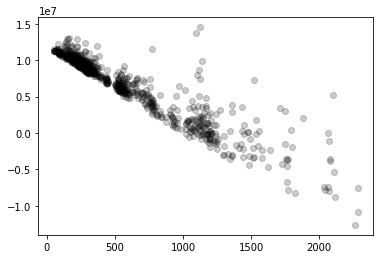

In [24]:
plt.scatter(X_test['Open'], y_pred, color='black', alpha=0.2)

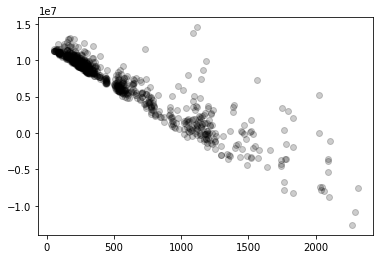

In [25]:
plt.scatter(X_test['Close'], y_pred, color='black', alpha=0.2)

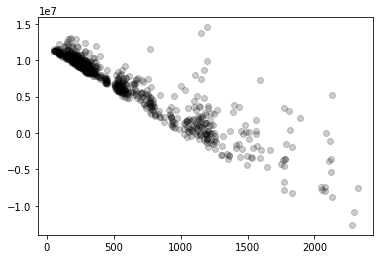

In [26]:
plt.scatter(X_test['High'], y_pred, color='black', alpha=0.2)

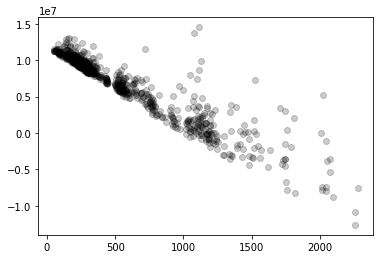

In [27]:
plt.scatter(X_test['Low'], y_pred, color='black', alpha=0.2)

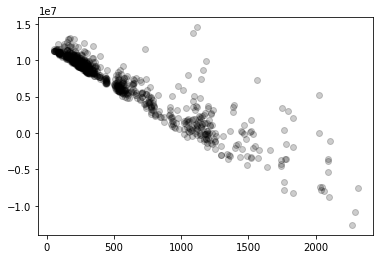

In [28]:
plt.scatter(X_test['Adj Close'], y_pred, color='black', alpha=0.2)